<h2><center>ASSIGNMENT 3</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 31</center></h2>
<h2><center>Q: CM1</center></h2>

### PART 1 : TRAINING OF DATASET USING WORD2VEC

### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

### IMPORTING THE DATASET

In [1]:
from datasets import load_dataset
dataset = load_dataset('climate_fever')
print(dataset)

Using custom data configuration default
Reusing dataset climate_fever (C:\Users\jayde\.cache\huggingface\datasets\climate_fever\default\1.0.1\3b846b20d7a37bc0019b0f0dcbde5bf2d0f94f6874f7e4c398c579f332c4262c)


DatasetDict({
    test: Dataset({
        features: ['claim_id', 'claim', 'claim_label', 'evidences'],
        num_rows: 1535
    })
})


In [124]:
dataset['test'][0]

{'claim': 'Global warming is driving polar bears toward extinction',
 'claim_id': '0',
 'claim_label': 0,
 'evidences': [{'article': 'Extinction risk from global warming',
   'entropy': 0.6931471824645996,
   'evidence': '"Recent Research Shows Human Activity Driving Earth Towards Global Extinction Event".',
   'evidence_id': 'Extinction risk from global warming:170',
   'evidence_label': 2,
   'votes': ['SUPPORTS', 'NOT_ENOUGH_INFO', None, None, None]},
  {'article': 'Global warming',
   'entropy': 0.0,
   'evidence': 'Environmental impacts include the extinction or relocation of many species as their ecosystems change, most immediately the environments of coral reefs, mountains, and the Arctic.',
   'evidence_id': 'Global warming:14',
   'evidence_label': 0,
   'votes': ['SUPPORTS', 'SUPPORTS', None, None, None]},
  {'article': 'Global warming',
   'entropy': 0.6931471824645996,
   'evidence': 'Rising temperatures push bees to their physiological limits, and could cause the extinctio

Observing the dataset, we see that the dataset is in the form of a dictionary and we will use claim and evidences as features to train our data, since these include sentences which can be used to train our model to generate word embeddings. 

### CONSTRUCTING CORPUS --- ALL SENTENCES IN THE DATASET

In [3]:
## construct corpus - All the sentences in the dataset
corpus = []
for item in dataset['test']:
    corpus.append(item['claim'])
    for evidence in item['evidences']:
        corpus.append(evidence['evidence'])

In [4]:
len(corpus)

9210

### TEXT PREPROCESSING USING NLTK

<p>As part of data preprocessing, following tasks are performed:<p>
<ul>
            <li>Tokenisation of the dataset</li>
            <li>Conversion to lowercase</li>
            <li>Removal of stopwords</li>
            <li>Removing punctuations, numbers and special characters</li>
            <li>Lemmatization</li>
            <li>Stemming</li>
</ul>

### Tokenization

As part of tokenization, we will split longer strings into texts of smaller tokens. Further processing will be done on the text only after it has been appropriately tokenized. Note that the input to word2vec will be a list of tokenized sentences, so that the context of each word when used in a sentence is preserved.

In [5]:
from nltk.tokenize import word_tokenize
words_corpus = [word_tokenize(sentence) for sentence in corpus]

### Conversion to lowercase and removal of stop words

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

fil_list = []
for sentence_list in words_corpus:
    lower_case_sentence = [word.lower() for word in sentence_list]
    fil_list.append(list(filter(lambda x: x not in stop_words,lower_case_sentence)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ul>
<li>Here we are converting all the data to lowercase do that same words are not treated differently because of difference in cases.This is neceassary so that words 'Earth' and 'earth' have same meaning but when not converted to lowercase, these would be treated as two different words in vector space.</li>
<li>After that we need to remove stop words, these are the words which don't add any additional value to the document.Here we are using nltk library to download all the stop words in english language and then we filter our corpus so that it does not include these stop words.</li></ul>

### Remove Punctuation, numbers and special characters

In [7]:
import re
final_corpus = []
for sentence_list in fil_list:
    final_corpus.append(list(filter(lambda x: not bool(re.match('[^a-zA-Z]',x)), sentence_list)))

<ul>
<li>Numbers are generally converted to words when they contain a very useful information about the data for example in banking/financial data. Our data contains information about climate , where numbers are not adding any additional information to the data. So in this case, we are removing the numbers.</li>
<li>All the punctuation, numbers and special characters are removed from the corpus, as these are unnecesarry symbols and do not contain any additional information about the data. All these characters will only create unnecessary vectors in the vector space.</li>
</ul>

### Lemmatization

In [8]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
final_corpus_lem = []
for sentence_list in final_corpus:
    final_corpus_lem.append(list(filter(lambda x: lemma.lemmatize(x),sentence_list)))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jayde\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatization reduces the words present in different forms to their base form which is also a meaningful dictionary word. It is necessary to reduce the text ambiguity. Here, we are using WordNet lemmatizer from the nltk library to lemmatize the text. 

### Stemming

In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
final_corpus_stem = []
for sentence_list in final_corpus_lem:
    final_corpus_stem.append(list(filter(lambda x: stemmer.stem(x),sentence_list)))

Stemming is a text-normalisation technique that removes the prefix and affix from the words. For example words like "wait", "waiting", "waited", "waits" are reduced to "wait". We are using PorterStemmer in the nltk library to stem the tokens in the corpus. It is necessary as it reduces the converts different variations of the same word to a same form.

After all the data preprocessing steps are complete, we split our data into train and test sets. An important point to note here is that word2vec needs the context of the words to generate correct embeddings. Thus we keep the context of the words same as in the input data and perform the split on the basis of the sentences in the input data. 
We split our data such that the train data contains 80% of the sentences and test set contains 20% of the sentences. (The total number of words will be different in both the sets as length of sentences may vary)

In [11]:
from sklearn.model_selection import train_test_split
train_corpus, test_corpus = train_test_split(final_corpus_stem, test_size = 0.2, random_state = 0)

### Generate Embeddings with Word2vec

While generating embeddings with Word2vec, we generate with complete dataset(train+test). This is because Word2vec gives error embedding unseen words.

In [12]:
import pandas as pd
from gensim.models import Word2Vec

model = Word2Vec(final_corpus_stem, workers = 1) ## default seed = 1
complete_embedding = pd.DataFrame(columns = range(0,100))

for word in model.wv.vocab:
    complete_embedding.loc[word] = model.wv[word]
complete_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
global,-0.568775,-0.338097,0.132942,0.072865,-1.010272,-0.438955,0.125711,-0.026338,-0.376328,0.121798,...,-0.278036,-0.284169,-0.032935,-0.129393,0.976994,-0.987039,-0.110614,-0.673994,-0.365496,0.590665
warming,-0.335332,-0.212150,0.216409,0.227106,-0.738190,-0.379161,-0.021136,-0.020730,-0.388319,0.179445,...,-0.297352,-0.231463,0.061940,-0.083041,0.863640,-0.985942,-0.032778,-0.441281,-0.439736,0.590540
driving,-0.116966,-0.216662,0.231355,0.196537,-0.198355,-0.018978,-0.199704,-0.024407,-0.181422,0.003508,...,-0.035713,-0.092800,0.052363,-0.005242,0.212818,-0.294014,-0.030985,-0.056035,-0.187407,0.242479
polar,-0.226589,-0.507905,0.631613,0.407897,-0.268773,0.120460,-0.667699,-0.139531,-0.380417,-0.112360,...,0.148525,-0.180279,0.014541,-0.102157,0.207456,-0.156635,-0.135676,-0.189670,-0.297332,0.393330
bears,-0.099315,-0.260742,0.308107,0.220830,-0.196689,0.016254,-0.278153,-0.045373,-0.214067,-0.038681,...,0.033337,-0.103435,0.081663,0.012419,0.184800,-0.251467,-0.049694,-0.082064,-0.188921,0.276853


From the embedding generated for complete data, we filter out the embeddings for the words in the test data

In [13]:
test_set_words = [word for sentence in test_corpus for word in sentence]
test_embedding = complete_embedding[complete_embedding.index.isin(test_set_words)]
test_embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
global,-0.568775,-0.338097,0.132942,0.072865,-1.010272,-0.438955,0.125711,-0.026338,-0.376328,0.121798,...,-0.278036,-0.284169,-0.032935,-0.129393,0.976994,-0.987039,-0.110614,-0.673994,-0.365496,0.590665
warming,-0.335332,-0.212150,0.216409,0.227106,-0.738190,-0.379161,-0.021136,-0.020730,-0.388319,0.179445,...,-0.297352,-0.231463,0.061940,-0.083041,0.863640,-0.985942,-0.032778,-0.441281,-0.439736,0.590540
driving,-0.116966,-0.216662,0.231355,0.196537,-0.198355,-0.018978,-0.199704,-0.024407,-0.181422,0.003508,...,-0.035713,-0.092800,0.052363,-0.005242,0.212818,-0.294014,-0.030985,-0.056035,-0.187407,0.242479
polar,-0.226589,-0.507905,0.631613,0.407897,-0.268773,0.120460,-0.667699,-0.139531,-0.380417,-0.112360,...,0.148525,-0.180279,0.014541,-0.102157,0.207456,-0.156635,-0.135676,-0.189670,-0.297332,0.393330
bears,-0.099315,-0.260742,0.308107,0.220830,-0.196689,0.016254,-0.278153,-0.045373,-0.214067,-0.038681,...,0.033337,-0.103435,0.081663,0.012419,0.184800,-0.251467,-0.049694,-0.082064,-0.188921,0.276853
toward,-0.042308,-0.099569,0.116459,0.080434,-0.078344,0.000337,-0.097192,-0.016703,-0.082869,-0.017358,...,0.002453,-0.039910,0.037905,0.013972,0.077887,-0.106070,-0.019633,-0.033213,-0.072421,0.105517
extinction,-0.094938,-0.270878,0.346009,0.264100,-0.206536,0.007409,-0.319385,-0.048876,-0.227548,-0.039121,...,0.044710,-0.112000,0.084303,0.011807,0.194081,-0.252089,-0.067507,-0.089317,-0.184438,0.303042
recent,-0.322345,-0.406870,0.051291,0.280043,-0.924127,-0.350084,0.051588,0.052771,-0.477177,0.055784,...,-0.185432,-0.252891,0.232245,-0.018278,0.791442,-0.856129,-0.044381,-0.739197,-0.040094,0.395927
research,-0.126556,-0.414750,0.462323,0.396950,-0.342769,-0.106389,-0.449327,-0.011369,-0.289514,0.007646,...,0.059254,-0.182899,0.051876,0.059618,0.246298,-0.404762,-0.143777,-0.120075,-0.200678,0.565876
shows,-0.109022,-0.251379,0.288301,0.205792,-0.242946,-0.021777,-0.257870,-0.045511,-0.229627,-0.026568,...,0.027285,-0.115776,0.060839,0.005693,0.219309,-0.249392,-0.064602,-0.155392,-0.163109,0.290087


### PART 2: ANALYSE WORD2VEC EMBEDDINGS OF THE TEST DATA USING COSINE SIMILARITY

### COSINE SIMILARITY MATRIX REPRESENTATION USING HEAT MAP

To find the relation between the words, we select a few words from the test set and compute their cosine similarity matrix.

<AxesSubplot:>

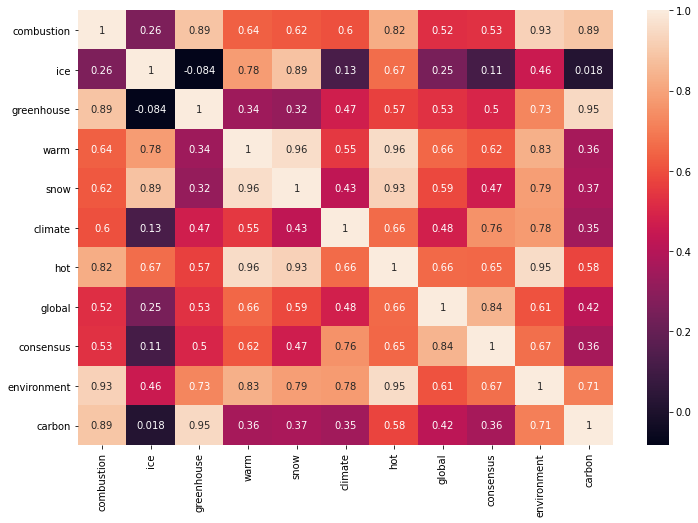

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
words = ['combustion','ice', 'greenhouse', 'warm', 'snow', 'climate', 'hot', 'global', 'consensus', 'environment','carbon']
sim_matrix = [];
for word1 in words:
    sim_list = []
    for word2 in words:
        sim_list.append(model.wv.similarity(word1, word2))
    sim_matrix.append(sim_list)
similarity_matrix = pd.DataFrame(sim_matrix, index= words, columns = words)
plt.figure(figsize=(12,8))
sns.heatmap(similarity_matrix, annot = True)

<p>Analysing the similarities between different pair of words, we notice the following observations:</p>
<ul>
    <li>snow is most similar to ice and words like greenhouse and carbon are most dissimilar to ice.</li>
    <li>combustion and carbon are most similar to greenhouse.</li>
    <li>hot and warm have very high similarity.</li>
    <li>consensus has high similarity with global.</li>
    <li>environment is most similar to hot and combustion</li>
    </ul>
Similar pair of words have cosine similarity near to one and dissimilar words have similarity near to zero. We observe that although our model is correctly able to find out most similar and dissimilar pairs. There are some results that do not represent correct relation between the pairs. For instance:
<ul>
<li> ice and warm/hot have high similarity </li>
<li> snow and environment have high similarity</li>
    </ul>

The model is not able to capture all the similarities properly because the text corpus is not large enough, and moreveor vector size is also small. To get good results , we need larger training data.


### ANALYSING WORD SIMILARITY IN VECTOR SPACE

To analyse the word similarity in vector space, we will check the words similar to the following set of words:
greenhouse, human, arctic, industrial, energy.

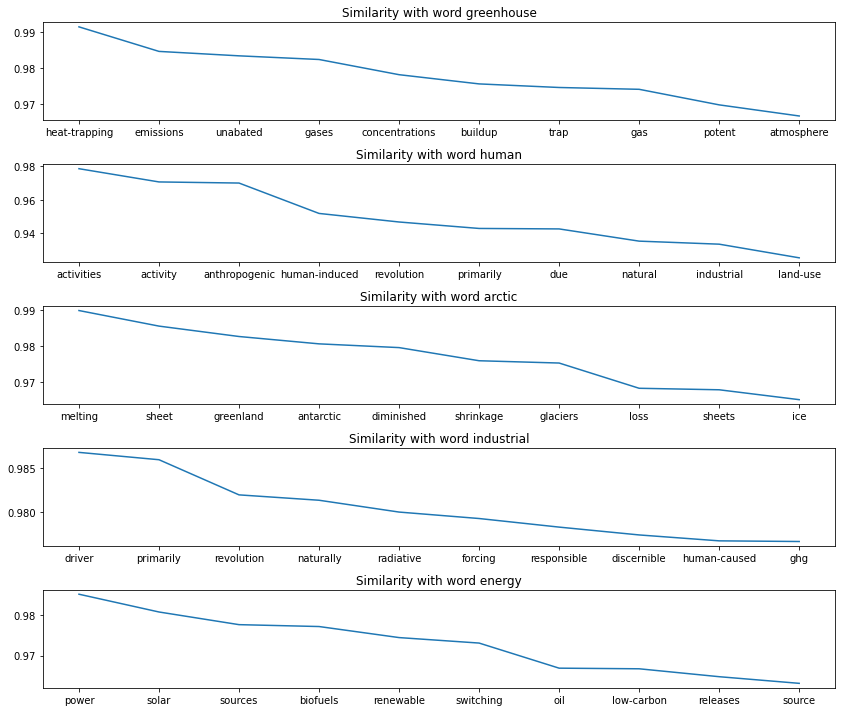

In [61]:
sample_words = ['greenhouse', 'human', 'arctic', 'industrial', 'energy']

def construct_similarity_plot(word):
    x_values = []
    y_values = []
    similar_words = model.wv.most_similar(word)
    for pair in similar_words:
        sim_word, cos_similarity = pair
        x_values.append(sim_word)
        y_values.append(cos_similarity)
    plt.tight_layout()
    plt.title((f"Similarity with word {word}"))
    sns.lineplot(x=x_values, y = y_values, palette = 'dark')
    
fig = plt.figure(figsize=(12,10))
subplot_no = 511
for word in sample_words:
    plt.subplot(subplot_no)
    construct_similarity_plot(word)
    subplot_no += 1


Observations:
<ul>
    <li><b>Greenhouse</b>: Heat-traping is the most similar word to Greenhouse. Other similar words are gases, concentrations and atmosphere.</li>
    <li><b>Human</b>: the most similar words are anthropogenic, human-induced and activity</li>
    <li><b>Arctic</b>: the most similar words are melting, Greenland, antarctic and glaciers</li>
    <li><b>Industrial</b>: the most similar words are revolution, human caused, radiative</li>
    <li><b>Energy</b>: the results contain different types of energies like power, solar , renewable and oil</li>
</ul>
<p>We observe that words in siliar context actually are actually similar as per our model. Also note that there are some dissimlar words in the results as well For example: potent comes in the list of similar words to greenhouse, similarly discernable and naturally come as similar words to industrial.</p

Now, we will check if our model correctly identifies the word which does not belong to the group of words

In [62]:
# food is the odd one out
model.wv.doesnt_match(['ice','food', 'snow' , 'greenland'])

C:\Users\jayde\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'food'

In [63]:
# ocean is the odd one out
model.wv.doesnt_match(['celsius','fahrenheit', 'temperature' , 'ocean'])

'ocean'

In [64]:
# machine is the odd one out
model.wv.doesnt_match(['machine','glacier', 'mountain' , 'rainfall'])

'machine'

These results tell us that our word2vec model is somehow reflecting the semantic and syntactic structure of the text corpus. We can obviously have better results by training our model with a larger text corpus. 

### PART 3: ARITHMETIC RELATIONSHIPS IN VECTOR SPACE

In [65]:
## century -> years
## celsius -> temperature
## century - years + celcius = temperature
model.wv.most_similar(positive=['century','celsius'], negative=['years'])

[('projected', 0.9509601593017578),
 ('temperature', 0.95045405626297),
 ('mean', 0.9448695182800293),
 ('fahrenheit', 0.9413317441940308),
 ('likely', 0.9380425214767456),
 ('degrees', 0.9362972378730774),
 ('scenario', 0.934786856174469),
 ('judge', 0.9346569180488586),
 ('long-term', 0.9311227798461914),
 ('mm/yr', 0.9306313991546631)]

The results of the arithmetic operation include temperature and fahrenheit. This holds true as century is a measurement of number of years, and celsius is a measurement of temperature.

In [66]:
## ocean -> water
## glaciers -> ice
## ocean - water + glaciers = ice
model.wv.most_similar(positive=['ocean', 'glaciers'], negative=['water'])

[('arctic', 0.9744213819503784),
 ('melting', 0.9741283655166626),
 ('greenland', 0.9690354466438293),
 ('sheet', 0.9636444449424744),
 ('ice', 0.9608537554740906),
 ('sea', 0.9539744853973389),
 ('antarctic', 0.9504441022872925),
 ('sheets', 0.9501813650131226),
 ('age', 0.9417047500610352),
 ('shrinkage', 0.9254814386367798)]

The arithmetic operation ocean-water+glaciers gives results similar to ice/arctic/greenland. It correctly describes the analogy as ocean contains water and glaciers contain ice

In [67]:
# solar -> energy
# fossil -> fuels
# solar - energy + fossil = fuels
model.wv.most_similar(positive=['solar', 'fossil'], negative=['energy'])

[('burning', 0.9822109937667847),
 ('activity', 0.9748808741569519),
 ('deforestation', 0.9727069735527039),
 ('fuels', 0.9712866544723511),
 ('use', 0.966545820236206),
 ('activities', 0.9617531299591064),
 ('primarily', 0.9616127014160156),
 ('land-use', 0.9608474969863892),
 ('human', 0.9483944177627563),
 ('anthropogenic', 0.9466844797134399)]

The operation solar + fossil - energy gives results similar to fuels/burning/combustion. This holds true as solar is a form of energy and fossils are a form of fuel, and they release energy by combustion/burning. 

In [68]:
# hot-> cold
# natural -> anthropogenic
# hot - cold + natural= anthropogenic
model.wv.most_similar(positive=['hot', 'natural'], negative=['cold'])

[('anthropogenic', 0.9754436612129211),
 ('agent', 0.973076343536377),
 ('activity', 0.9670088291168213),
 ('primarily', 0.9649285078048706),
 ('activities', 0.9643402099609375),
 ('use', 0.9621832370758057),
 ('deforestation', 0.9613704085350037),
 ('non-renewable', 0.961235761642456),
 ('human', 0.960053563117981),
 ('secondarily', 0.9575260281562805)]

In the operation hot - cold + natural, hot and cold are opposite of each other, thus the result should be opposite of natural. And the topmost result is anthropogenic, which refers to something originating by human activity. 

In [69]:
# renewable -> non-renewable
# decrease -> exceeding
# renewable - non-renewable + decrease = exceeding
model.wv.most_similar(positive=['renewable', 'decrease'], negative=['non-renewable'])

[('melted', 0.9902676343917847),
 ('winter', 0.9899835586547852),
 ('little', 0.989730954170227),
 ('exceeding', 0.9888798594474792),
 ('extent', 0.9887081384658813),
 ('experienced', 0.988316535949707),
 ('area', 0.9883125424385071),
 ('partial', 0.9878647327423096),
 ('covered', 0.9876752495765686),
 ('eastern', 0.9875850677490234)]

In the operation, renewable - non-renewable + decrease, the words renewable and non-renewable are opposite of each other, thus the result should be opposite of decrease. The result contains exceeding which is kind of synonym for increase.Note that the result also contrains various other words which are not related to the operation, this is because the training dataset is small and the model is not trained properly.

In [26]:
# pre-industrial -> medieval
# atmosphere -> atmospheric
# pre-industrial - medieval + atmosphere = atmospheric
model.wv.most_similar(positive=['pre-industrial', 'atmosphere'], negative=['medieval'])

[('atmospheric', 0.9181003570556641),
 ('concentrations', 0.9162386655807495),
 ('co', 0.9161651134490967),
 ('concentration', 0.9154882431030273),
 ('dioxide', 0.9105706214904785),
 ('differ', 0.9038774371147156),
 ('co2', 0.9024748802185059),
 ('traps', 0.900910496711731),
 ('carbon', 0.8845914006233215),
 ('consequent', 0.8545078039169312)]

In the opeation pre-industrial - medieval + atmosphere = atmospheric, the words pre-industrial and medieval refer to old-times of the history.And the result contains words similar to atmosphere like atmospheric/co2/methane.

In [114]:
# melt -> melted
# increase -> increased
# melt + increase - melted = increased
model.wv.most_similar(positive=['melt', 'increase'], negative=['melted'])

[('pre-industrial', 0.9496656656265259),
 ('causing', 0.9476884603500366),
 ('increases', 0.9430721998214722),
 ('levels', 0.9412436485290527),
 ('would', 0.9392227530479431),
 ('absence', 0.9372401237487793),
 ('ppm', 0.933881938457489),
 ('higher', 0.9306902885437012),
 ('increased', 0.929415762424469),
 ('near-surface', 0.9267055988311768)]

In the operation melt + increase - melted, melt and melted are different forms of the same word, and the result contains increases and increased with are different forms of the word increase.

### PART 4: COMPARISON WITH PRE-TRAINED MODELS

<p>Now we load the following pre-trained models and will compare the results of the above arithmetic relationships:</p>
    <ul>
    <li>word2vec-google-news-300</li>
    <li>glove-wiki-gigaword-50</li>
    </ul>

In [116]:
import gensim.downloader as api

# load google word2vec pretrained model
model_word2vec_google = api.load('word2vec-google-news-300')

# load glove pre-trained model
model_glove_wiki = api.load("glove-wiki-gigaword-50")

### Arithmetic operation: century - years + celsius

In [29]:
print("Results by ClimateFever Word2vec model: ")
print(model.wv.most_similar(positive=['century','celsius'], negative=['years']))
print("\nResults by Word2vec model: ")
print(model_word2vec_google.most_similar(positive=['century','celsius'], negative=['years']))
print("\nResults by Glove model: " ) 
print(model_glove_wiki.most_similar(positive=['century','celsius'], negative=['years']))

Results by ClimateFever Word2vec model: 
[('projected', 0.9579795598983765), ('temperature', 0.9530355334281921), ('mean', 0.9520713090896606), ('judge', 0.9440485239028931), ('fahrenheit', 0.9424047470092773), ('disappeared', 0.9420379400253296), ('mm/yr', 0.9396512508392334), ('degrees', 0.9391785860061646), ('likely', 0.9354960322380066), ('scenario', 0.9346247911453247)]

Results by Word2vec model: 
[('6C_##F', 0.5175663828849792), ('-3_°_C', 0.5078456997871399), ('2C_##F', 0.4964003562927246), ('-7_°_C', 0.4873068928718567), ('Celcius', 0.47457313537597656), ('-2_°_C', 0.47378942370414734), ('##C_##C', 0.47283223271369934), ('##F_##C', 0.4702456295490265), ('Temperatures', 0.46648797392845154), ('##.#F_##.#C', 0.4664062261581421)]

Results by Glove model: 
[('40-degree', 0.7099734544754028), ('19th-20th', 0.6710644960403442), ('15th-16th', 0.6567678451538086), ('18th-19th', 0.6505208015441895), ('17th-18th', 0.6456223130226135), ('38-degree', 0.6449287533760071), ('pre-industrial'

### Arithmetic operation: ocean - water + glaciers

In [30]:
print("Result by ClimateFever Word2vec model: ")
print(model.wv.most_similar(positive=['ocean','glaciers'], negative=['water']))
print("\nResult by Google Word2vec model: ")
print(model_word2vec_google.most_similar(positive=['ocean','glaciers'], negative=['water']))
print("\nResult by Glove model: " ) 
print(model_glove_wiki.most_similar(positive=['ocean','glaciers'], negative=['water']))

Result by ClimateFever Word2vec model: 
[('greenland', 0.9721417427062988), ('melting', 0.9718507528305054), ('arctic', 0.9705687761306763), ('sheet', 0.9656683206558228), ('ice', 0.9630230665206909), ('sheets', 0.9585027694702148), ('sea', 0.9571092128753662), ('antarctic', 0.9524481296539307), ('age', 0.9419762492179871), ('level', 0.9302603006362915)]

Result by Google Word2vec model: 
[('oceans', 0.631592869758606), ('glacier', 0.6259989738464355), ('Antarctica', 0.6205669045448303), ('Antarctic_Peninsula', 0.5972974300384521), ('mountain_glaciers', 0.5788881778717041), ('Arctic_Ocean', 0.5779505968093872), ('Antarctic_ice', 0.5631057024002075), ('tidewater_glaciers', 0.5627486109733582), ('oceanic', 0.5619900226593018), ('seamount', 0.5612707138061523)]

Result by Glove model: 
[('antarctica', 0.8383561372756958), ('arctic', 0.7630214691162109), ('glacier', 0.7602767944335938), ('equator', 0.7015934586524963), ('polar', 0.692257285118103), ('antarctic', 0.6766441464424133), ('iceb

### Arithmetic operation: solar - energy + fossil

In [31]:
print("Result by ClimateFever Word2vec model: ")
print(model.wv.most_similar(positive=['solar','fossil'], negative=['energy']))
print("\nResult by Google Word2vec model: ")
print(model_word2vec_google.most_similar(positive=['solar','fossil'], negative=['energy']))
print("\nResult by Glove model: " ) 
print(model_glove_wiki.most_similar(positive=['solar','fossil'], negative=['energy']))

Result by ClimateFever Word2vec model: 
[('burning', 0.9820549488067627), ('deforestation', 0.9751210808753967), ('fuels', 0.9715372323989868), ('use', 0.9702720046043396), ('activity', 0.9685322642326355), ('primarily', 0.9612590074539185), ('land-use', 0.9586544632911682), ('activities', 0.9522514343261719), ('broad-scale', 0.9467196464538574), ('combustion', 0.9460698366165161)]

Result by Google Word2vec model: 
[('fossils', 0.6636049747467041), ('dinosaur_fossils', 0.5981628894805908), ('dinosaur_fossil', 0.5779707431793213), ('fossilized_remains', 0.569790244102478), ('fossilized_bones', 0.5572913289070129), ('fossilized', 0.5564877986907959), ('paleontologists', 0.5303204655647278), ('palaeontologists', 0.5300697684288025), ('dinosaur_species', 0.5279468297958374), ('hominid_fossil', 0.5177165269851685)]

Result by Glove model: 
[('dinosaur', 0.7213565111160278), ('fossils', 0.7140518426895142), ('asteroids', 0.7139967679977417), ('fossilized', 0.7077831029891968), ('hominid', 0

### Arithmetic operation: hot - cold + natural

In [32]:
print("Result by ClimateFever Word2vec model: ")
print(model.wv.most_similar(positive=['hot','natural'], negative=['cold']))
print("\nResult by Google Word2vec model: ")
print(model_word2vec_google.most_similar(positive=['hot','natural'], negative=['cold']))
print("\nResult by Glove model: " ) 
print(model_glove_wiki.most_similar(positive=['hot','natural'], negative=['cold']))

Result by ClimateFever Word2vec model: 
[('anthropogenic', 0.9714184999465942), ('agent', 0.9645185470581055), ('activity', 0.9621996283531189), ('human', 0.9610843658447266), ('activities', 0.9604661464691162), ('primarily', 0.9563999772071838), ('non-renewable', 0.9527465105056763), ('effect', 0.948796272277832), ('use', 0.9470745921134949), ('long-lasting', 0.9455364942550659)]

Result by Google Word2vec model: 
[('Splittorff_lacked', 0.42180782556533813), ('hottest', 0.40199485421180725), ('shell_salted_pistachios', 0.3966864347457886), ('Mike_Taugher_covers', 0.38580065965652466), ('du_jour', 0.34877434372901917), ('naturally', 0.34808653593063354), ('Natural', 0.3411977291107178), ('nontoxic_dyes', 0.33683377504348755), ('Hot', 0.3360252380371094), ('Peckumn_grows_alfalfa', 0.3356711268424988)]

Result by Glove model: 
[('produces', 0.7412264943122864), ('produce', 0.7294062972068787), ('producing', 0.7230210900306702), ('water', 0.7188149690628052), ('mineral', 0.714482903480529

### Arithmetic operation: melt - melted - increase

In [119]:
print("Result by ClimateFever Word2vec model: ")
print(model.wv.most_similar(positive=['melt', 'increase'], negative=['melted']))
print("\nResult by Google Word2vec model: ")
print(model_word2vec_google.most_similar(positive=['melt', 'increase'], negative=['melted']))
print("\nResult by Glove model: " ) 
print(model_glove_wiki.most_similar(positive=['melt', 'increase'], negative=['melted']))

Result by ClimateFever Word2vec model: 
[('pre-industrial', 0.9496656656265259), ('causing', 0.9476884603500366), ('increases', 0.9430721998214722), ('levels', 0.9412436485290527), ('would', 0.9392227530479431), ('absence', 0.9372401237487793), ('ppm', 0.933881938457489), ('higher', 0.9306902885437012), ('increased', 0.929415762424469), ('near-surface', 0.9267055988311768)]

Result by Google Word2vec model: 
[('decrease', 0.7130624651908875), ('increases', 0.654790997505188), ('rise', 0.5817747116088867), ('reduction', 0.5771417021751404), ('decreases', 0.5626585483551025), ('toincrease', 0.5614994764328003), ('decline', 0.5536827445030212), ('increasing', 0.5482987761497498), ('increased', 0.5411779880523682), ('reduce', 0.5152913928031921)]

Result by Glove model: 
[('increases', 0.9072279930114746), ('decrease', 0.8527100086212158), ('reduction', 0.8464184999465942), ('reduce', 0.8416398763656616), ('reducing', 0.8335956931114197), ('increasing', 0.8240149021148682), ('increased', 0

For the following two arithmetic relations, the results cannot be compared as these words are not present in the pretrained model Google word2vec vocabulary:
<ul>
<li>model.wv.most_similar(positive=['renewable', 'decrease'], negative=['non-renewable'])</li>
<li>model.wv.most_similar(positive=['pre-industrial', 'atmosphere'], negative=['medieval'])</li>
<ul>


# SUMMARY OF THE RESULTS 

<table>
 <tr>
    <th>Model</th>
    <th>Arithmetic Operation</th>
    <th>Result</th>
 </tr>
<tr>
    <td>Climate Fever Word2Vec</td>
    <td>century - years + celsius</td>
    <td>projected, temperature, mean, fahrenheit, degrees, likely, scenario</td>
</tr>
<tr>
    <td>Google Word2Vec</td>
    <td>century - years + celsius</td>
    <td>-3°C,'-7°C, Celcius, Temperatures</td>
</tr>
<tr>
    <td>Glove</td>
    <td>century - years + celsius</td>
    <td>40-degree, 19th-20th , 15th-16th , 38-degree, pre-industrial, 16th-17th</td>
</tr>
<tr>
    <td> </td>
    <td> </td>
    <td> </td>
</tr>
<tr>
    <td>Climate Fever Word2Vec</td>
    <td>ocean - water + glaciers</td>
    <td>greenland, melting, arctic, sheet, ice, sheets, sea, antarctic, age, level</td>
</tr>
<tr>
    <td>Google Word2Vec</td>
    <td>ocean - water + glaciers</td>
    <td>oceans, glacier, Antarctica, mountain_glaciers,  oceanic, seamount</td>
</tr>
<tr>
    <td>Glove</td>
    <td>ocean - water + glaciers</td>
    <td>antarctica, arctic, glacier, equator, polar, antarctic, icebergs, coastlines</td>
</tr>
<tr>
    <td> </td>
    <td> </td>
    <td> </td>
</tr>
<tr>
    <td>Climate Fever Word2Vec</td>
    <td>solar - energy + fossil</td>
    <td>burning, deforestation, fuels, activity, land-use, activities,combustion</td>
</tr>
<tr>
    <td>Google Word2Vec</td>
    <td>solar - energy + fossil</td>
    <td>fossils,dinosaur_fossils, fossilized, palaeontologists, dinosaur_species</td>
</tr>
<tr>
    <td>Glove</td>
    <td>solar - energy + fossil</td>
    <td>dinosaur, fossils, asteroids, fossilized, hominid, footprints, exoplanets</td>
</tr>
<tr>
    <td> </td>
    <td> </td>
    <td> </td>
</tr>
<tr>
    <td>Climate Fever Word2Vec</td>
    <td>hot - cold + natural</td>
    <td>anthropogenic, agent, activity, human, activities, use, long-lasting</td>
</tr>
<tr>
    <td>Google Word2Vec</td>
    <td>hot - cold + natural</td>
    <td>hottest, Mike_Taugher_covers, naturally, Natural, nontoxic_dyes, Hot</td>
</tr>
<tr>
    <td>Glove</td>
    <td>hot - cold + natural</td>
    <td>produces, producing, water, mineral, quality, energy, abundant, product</td>
</tr>
<tr>
    <td> </td>
    <td> </td>
    <td> </td>
</tr>
<tr>
    <td>Climate Fever Word2Vec</td>
    <td>melt - melted - increase</td>
    <td>pre-industrial, increases, levels, would, absence, ppm, higher , increased</td>
</tr>
<tr>
    <td>Google Word2Vec</td>
    <td>melt - melted - increase</td>
    <td>decrease, increases, rise,increase, decline, increasing , increased</td>
</tr>
<tr>
    <td>Glove</td>
    <td>melt - melted - increase</td>
    <td>increases, decrease, reduce, reducing, increasing, increased, growth, rate</td>
</tr>
</table>
